In [4]:

import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal
from scipy.stats import norm 
from scipy.stats import uniform

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]


### Define the non-linearities

In [5]:
class non_linearity:

    def __init__(self,type):
        self.type = type

    def apply(self,x):
        if(self.type=='sigmoid'):
            return 1/(1+np.exp(-x))
        elif(self.type=='linear'):
            return x
        elif(self.type=='tanh'):
            return np.tanh(x)
        elif(self.type=='relu'):
            return np.multiply(x,x>0)
        else:
            print('Unknown type')
            return

    def diff(self,x):
        if(self.type=='sigmoid'):
            s = 1/(1+np.exp(-x))
            return(np.multiply(s,(1-s)))
        elif(self.type=='linear'):
            return(np.ones(x.shape))
        elif(self.type=='tanh'):
            return(1-np.power(x,2))
        elif(self.type=='relu'):
            return(x>0)
        else:
            print('Unknown type')
            return

### Define the losses and their derivatives

In [6]:
class lossfunction:

    def __init__(self,type):
        self.type = type

    def apply(self,A2, Y):
        if(self.type=='cross_entropy'):
            m = Y.shape[1] 
            # implementing the above formula 
            logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) 
            cost = - np.sum(logprobs) / m 
      
            # Squeezing to avoid unnecessary dimensions 
            cost = np.squeeze(cost) 
            return cost 
        elif(self.type=='mse'):
            m = Y.shape[1] 
            # implementing the above formula 
            err = np.power(A2-Y,2)
            cost = np.sum(err) / m 
      
            # Squeezing to avoid unnecessary dimensions 
            cost = np.squeeze(cost) 
            return(cost)
        else:
            print('Unknown cost type')
            return
    
    def diff(self,A2,Y):
        if(self.type=='cross_entropy'):
            m = Y.shape[1] 
            out = A2-Y
            out = np.divide(out,np.multiply(A2,(1-A2)))
            return out
        elif(self.type=='mse'):
            m = Y.shape[1] 
            out = (A2-Y)
            return(out)
        else:
            print('Unknown cost type')
            return

#### Defining and initializing the network

YOUR TASKS: 

  1. Complete the forward propagation part
  
  2. Complete the backpropagation part for the first layer

In [16]:
class neural_network: 
    def __init__(self,Nhidden,Nfeatures,Noutputs,Nonlinearities):
        
        self.Nhidden = Nhidden
        self.W1 = np.random.randn(Nhidden, Nfeatures) * 0.1
        self.b1 = np.zeros(shape =(Nhidden, 1)) 
        self.nl1 = non_linearity(Nonlinearities[0])

        self.W2 = np.random.randn(Noutputs, Nhidden) * 0.1
        self.b2 = np.zeros(shape =(Noutputs, 1))
        self.nl2 = non_linearity(Nonlinearities[1])

    
    def forward_prop(self,X): 
        self.Z1 = np.dot(self.W1,X)
        self.A1 = self.nl1.apply(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.nl2.apply(self.Z2)
        return self.A2

    def back_propagate(self,dA2,X,learning_rate): 
        m = X.shape[1]
        dZ2 = np.multiply(dA2 ,self.nl1.diff(self.Z2))
        dW2 = (1 / m) * np.dot(dZ2, self.A1.T) 
        db2 = (1 / m) * np.sum(dZ2, axis = 1) 
  
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = np.multiply(dA1, self.nl1.diff(self.A1))
        dW1 = (1/m)*np.dot(dZ1, X.T)
        db1 = (1/m)*np.sum(dZ1, axis = 1)
      
        # Updating the parameters according to algorithm 
        self.W1 = self.W1 - learning_rate * dW1 
        self.b1 = self.b1 - learning_rate * db1 
        self.W2 = self.W2 - learning_rate * dW2 
        self.b2 = self.b2 - learning_rate * db2 
        return 
        
        

### Steepest descend optimization scheme

In [17]:
def optimize(nn,X,Y,loss,num_iterations,learning_rate):
    for i in range(0, num_iterations): 
        # Forward propagation. Inputs: "X, parameters". return: "A2, cache". 
        Ypred = nn.forward_prop(X)
        # Cost function. Inputs: "A2, Y". Outputs: "cost". 
        d = loss.apply(Ypred, Y) 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads". 
        diffLoss = loss.diff(Ypred,Y)
        nn.back_propagate(diffLoss,X,learning_rate)
        # Print the cost every 1000 iterations 
        if i % 500 == 0: 
            print ("Cost after iteration % i: % f" % (i, d)) 

In [18]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
#X, Y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
X, Y = make_circles(200, factor=.5, noise=.1)
indices0 = np.argwhere(Y==0)[:,0]
indices1 = np.argwhere(Y==1)[:,0]

In [19]:
X1 = X.T
Y1 = Y.T
Y1 = np.asmatrix(Y1)

Nhidden = 4
Nfeatures = X1.shape[0]
Noutputs = Y1.shape[0]
Nonlinearities = ['tanh','sigmoid']
nn = neural_network(Nhidden,Nfeatures,Noutputs,Nonlinearities)
loss = lossfunction('cross_entropy')

optimize(nn,X1,Y1,loss,20000,1)


Cost after iteration  0:  0.693092
Cost after iteration  500:  0.693079
Cost after iteration  1000:  0.693079
Cost after iteration  1500:  0.693079
Cost after iteration  2000:  0.693079
Cost after iteration  2500:  0.693079
Cost after iteration  3000:  0.693079
Cost after iteration  3500:  0.693079
Cost after iteration  4000:  0.693079
Cost after iteration  4500:  0.693079
Cost after iteration  5000:  0.693079
Cost after iteration  5500:  0.693079
Cost after iteration  6000:  0.693079
Cost after iteration  6500:  0.693079
Cost after iteration  7000:  0.693079
Cost after iteration  7500:  0.693079
Cost after iteration  8000:  0.693079
Cost after iteration  8500:  0.693079
Cost after iteration  9000:  0.693079
Cost after iteration  9500:  0.693079
Cost after iteration  10000:  0.693079
Cost after iteration  10500:  0.693079
Cost after iteration  11000:  0.693079
Cost after iteration  11500:  0.693079
Cost after iteration  12000:  0.693079
Cost after iteration  12500:  0.693079
Cost after

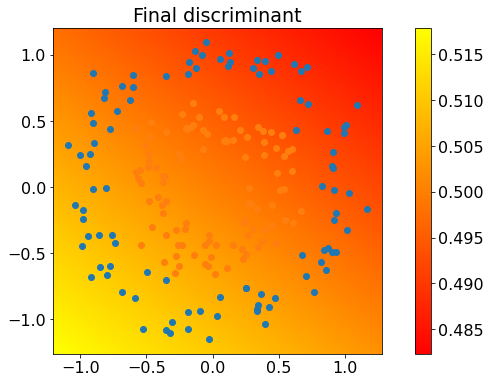

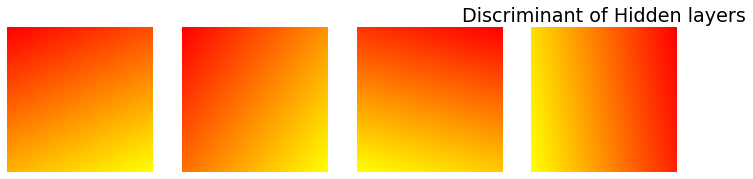

In [20]:
plt.figure()
s = plt.scatter(np.squeeze(np.asarray(X1[0,indices0])), np.squeeze(np.asarray(X1[1,indices0])))
s = plt.scatter(np.squeeze(np.asarray(X1[0,indices1])), np.squeeze(np.asarray(X1[1,indices1])))

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x = np.linspace(xmin,xmax, 100)
y = np.linspace(ymin,ymax, 100)
x1, y1 = np.meshgrid(x, y)
xy = np.vstack([x1.ravel(), y1.ravel()]).T
    
P = nn.forward_prop(xy.T)
s = plt.imshow(P.reshape(x1.shape),origin='lower',extent=(xmin,xmax,ymin,ymax), cmap=cm.autumn)
s = plt.colorbar()
plt.title('Final discriminant')

fig,axs = plt.subplots(1,nn.Nhidden)
plt.title('Discriminant of Hidden layers')

for i in range(nn.Nhidden):
    s = axs[i].imshow(nn.A1[i,:].reshape(x1.shape),origin='lower',extent=(xmin,xmax,ymin,ymax), cmap=cm.autumn)
    axs[i].axis('off')

